In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.fft import fft, fftfreq
from scipy.signal import welch as welch
from scipy.signal import detrend
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu, shapiro

# Introducción

Mediante el presente estudio se plantea evaluar cómo los procesos de análisis de señales pueden brindar datos significativos para determinar posibles tendencias anómalas de ciertas patologías cardiovasculares. En particular se emplea el método del biespectro, el cual es una herramienta que permite determinar la correlación entre las fases de 3 diferentes frecuencias de las señales. Este análisis resulta útil en el contexto de las enfermedades cardiovasculares, debido a que permiten plantear patrones predictivos mediante las correlaciones de fase que presentan las distintas frecuencias que son producidas por el sistema cardiovascular y captadas por dispositivos de electrocardiografía.

Dicho esto cabe recalcar la importancia de plantear métodos que permitan clasificar, identificar y analizar de manera precisa las distintas patologías cardiovasculares. Para ello se debe tener en cuenta que este tipo de modelos deben contemplar la capacidad trabajar con conjuntos de datos robustos; ya que para poder plantear modelos predictivos se debe ahondar en el comportamiento particular y general de las señales de sujetos que presenten y desarrollen dichas patologías. con el fin de poder extrapolar correctamente el análisis predictivo de las señales ECG.


# Metodologia 

Inicialmente se buscaron los datos asignados para desarrollar el presente estudio, los cuales se encontraban en el archivo ECGDataDenoised.zip [0], de donde se tomaron los datos de bradicardia sinusal (SB) y fibrilación auricular (AFIB). Una vez obtenidos y filtrados los datos mediante rutinas de detrend y comprensión, se procedió a programar las fórmulas matemáticas que permitan desarrollar el análisis de la frecuencia y potencia de las señales de estudio.

En esta metodología, se procesaron señales de electrocardiograma (ECG) provenientes de dos grupos: sujetos con fibrilación auricular (AFIB) y sujetos con ritmo sinusal (SB). Los datos se almacenaron en dos diccionarios, AFIB_xn y SB_xn, donde cada entrada correspondía a un registro de señal ECG. Para cada señal, se calcularon dos características principales: la frecuencia de máxima potencia (fMP) y la suma de frecuencias significativas de bicoherencia (sFSB). La fMP se obtuvo a partir del espectro de potencia de la señal, utilizando el método de Welch para mejorar la estimación de potencia, y seleccionando la frecuencia que presentaba el valor máximo. La sFSB se determinó mediante el cálculo del biespectro y la bicoherencia de la señal, identificando las frecuencias cuya bicoherencia superaba un umbral de significancia preestablecido.

El biespectro se calculó utilizando la Transformada Rápida de Fourier (FFT) segmentada para asegurar una mayor precisión, mientras que la bicoherencia se determinó normalizando la suma de productos cruzados de las frecuencias componentes. Posteriormente se diseña una rutina de procesamiento que analiza mediante el método del biespectro la correlación de las señales y adicionalmente la bicoherencia presente en ellas. Dicha rutina es capaz de procesar grupos robustos de datos, con el fin de desarrollar un estudio más generalizado en todo el conjunto de señales provistas; los resultados de dicha rutina de procesamiento serán almacenados  en un dataframe con el fin de realizar un análisis estadístico a los resultados pertenecientes a la señales de Sb y AFIB.

Las pruebas estadísticas incluyeron análisis de la distribución de las características, comparaciones de fMP y sFSB entre ambos grupos mediante pruebas de normalidad (Shapiro-Wilk) y pruebas de hipótesis (t-test o Mann-Whitney U según correspondiera). Además, se realizaron análisis de correlación y gráficos de dispersión para explorar la relación entre las variables. Este enfoque permitió identificar diferencias significativas entre los grupos, aportando información relevante para la caracterización de patrones en sujetos con y sin fibrilación auricular.

# Diagramas de Flujo de los 3 articulos respectivamente

https://www.nature.com/articles/s41746-023-00966-w

https://www.nature.com/articles/s41598-020-59821-7

https://www.sciencedirect.com/science/article/pii/S2405844024032316

# Prediction of atrial fibrillation from at-home single-lead ECG signals without arrhythmias

La metodología del estudio se centró en la predicción de la fibrilación auricular (FA) utilizando señales de ECG de una sola derivación. Se recopilaron 459,889 grabaciones de ECG obtenidas mediante parches ambulatorios durante un máximo de 14 días. El análisis incluyó características demográficas como edad y género, junto con métricas estándar de la variabilidad de la frecuencia cardíaca (HRV). Un módulo de aprendizaje profundo (DL módulo A) fue empleado para extraer automáticamente características morfológicas del ECG [3].

Las grabaciones se dividieron en intervalos de 10 minutos, integrándose las características extraídas en un modelo de aprendizaje profundo de dos etapas (DL módulo B). Este modelo evaluó la probabilidad de aparición de FA en un período de dos semanas. Para evaluar el rendimiento, se desarrollaron varios modelos: uno con características demográficas (AG), otro con datos de HRV (AG+HRV), uno con solo características del DL (DL Only), y uno con todas las características combinadas (All Features).

El desempeño se midió con el AUC y la precisión promedio, considerando diferentes duraciones de ventana de entrada (10 minutos, 1 hora, 24 horas), y se analizó en subgrupos de carga de FA (baja, media y alta). La calibración del modelo se hizo mediante normalización de características usando una cohorte de calibración.

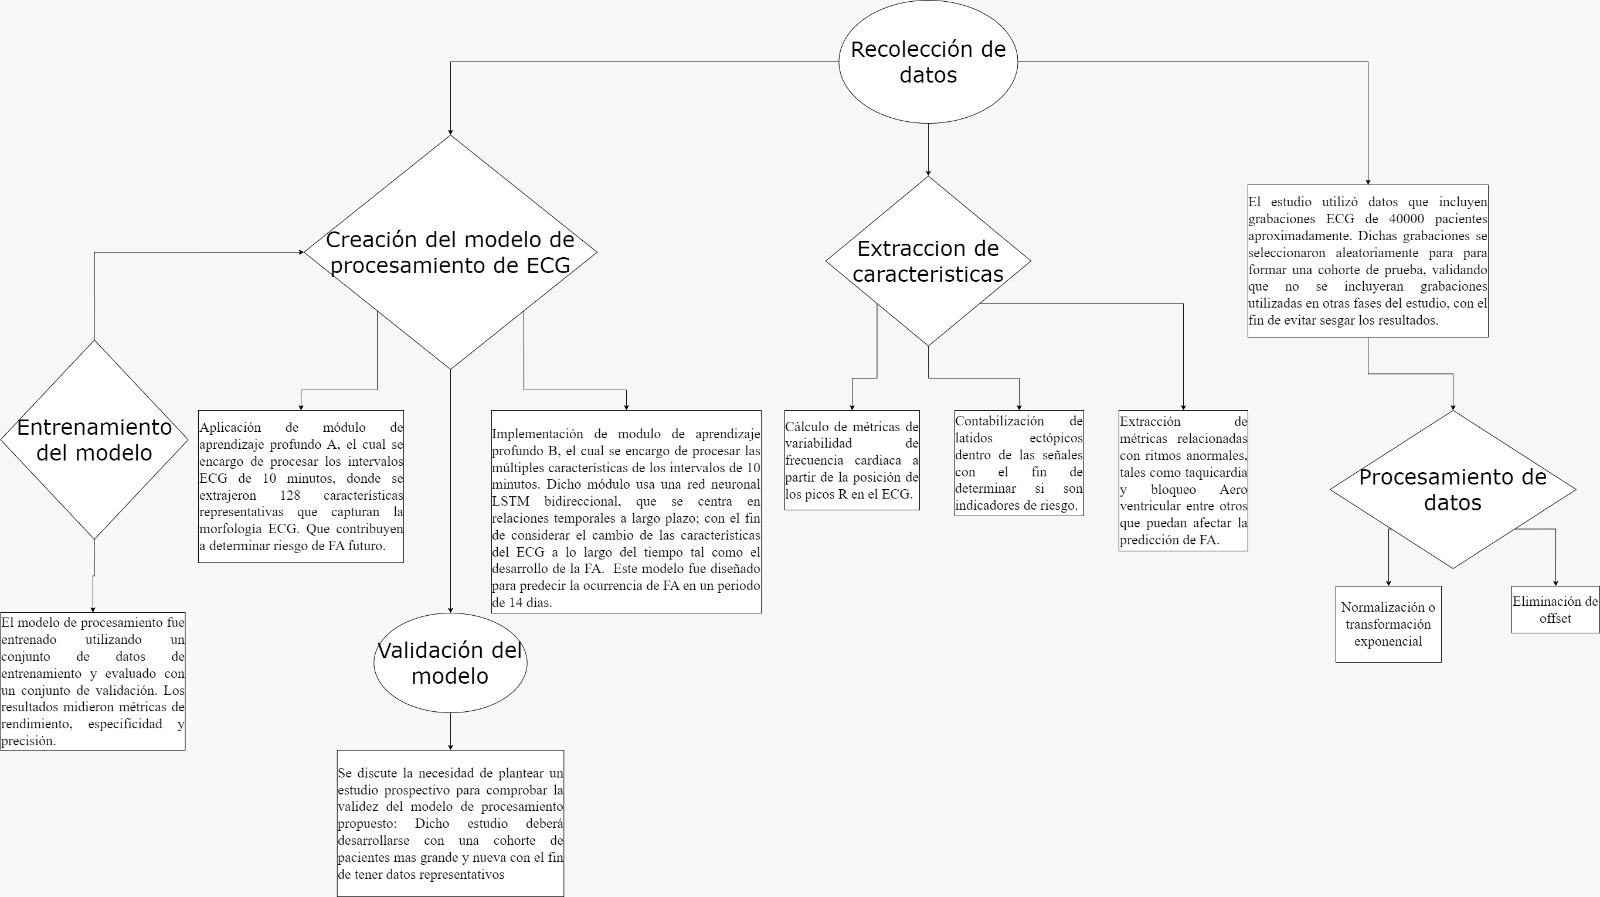

# Optimal Multi-Stage Arrhythmia Classification Approach

La metodología del estudio se enfocó en tres aspectos principales: la recolección de datos, la mejora de la calidad de las señales y la optimización de los modelos de clasificación. En primer lugar, se recopilaron 40,258 electrocardiogramas (ECG) de 12 derivaciones, seleccionados aleatoriamente de una muestra de 120,000 sujetos entre los años 2013 y 2018. Esta muestra incluyó tanto individuos con ritmos cardíacos normales como aquellos con diversas arritmias y afecciones cardíacas [4].

Para mejorar la calidad de los datos, se aplicaron varias técnicas de reducción de ruido. Se implementó un filtro pasa-bajos Butterworth para eliminar el ruido de alta frecuencia y, posteriormente, se utilizó una corrección LOESS para estabilizar la línea base de las señales ECG. Finalmente, se aplicó un algoritmo Non-Local Means (NLM) para eliminar cualquier ruido residual que pudiera haber quedado en las señales procesadas [4].

En cuanto a la selección de modelos, se llevó a cabo una optimización exhaustiva de hiper parámetros mediante la validación cruzada de 10 pliegues. Se evaluaron un total de 19 algoritmos de clasificación, entre los que destacan Decision Tree (DT), K-Nearest Neighbors (KNN), Gradient Boosting Tree (GBT) y Extreme Gradient Boosting Tree (EGBT). Este enfoque permitió identificar los mejores modelos para la clasificación de las señales ECG y optimizar métricas de rendimiento, como el puntaje F1, asegurando así un análisis robusto y preciso para el diagnóstico de diversas afecciones cardíacas [4].

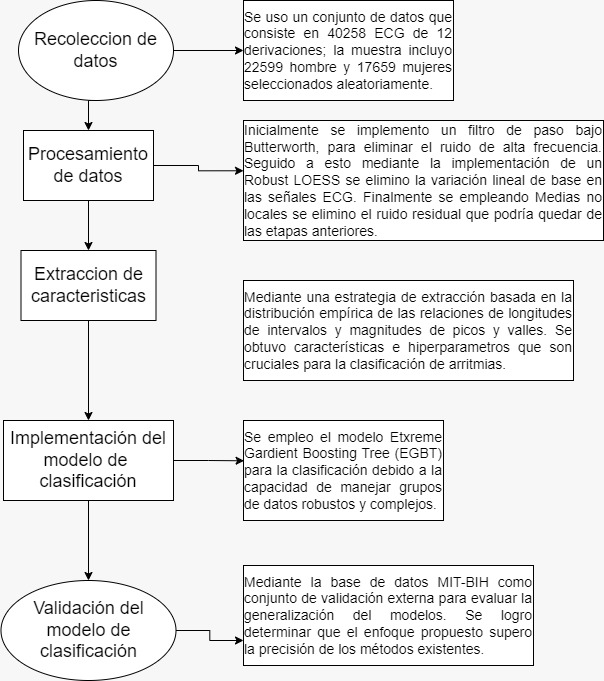

# An Arrhythmia classification approach via deep learning using single-lead ECG without QRS wave detection

El estudio se centra en la clasificación de arritmias utilizando redes neuronales convolucionales (CNN) con señales de ECG de una sola derivación, sin la necesidad de identificar la onda QRS, lo cual es tradicional en otros métodos de detección de arritmias. Para este propósito, se utilizaron bases de datos públicas de PhysioNet, incluyendo el MIT-BIH Arrhythmia Database, Atrial Fibrillation Database y el MIT-BIH Ventricular Fibrillation Database. Los segmentos de ECG se dividieron en intervalos de 5 y 10 segundos, comparándose los resultados obtenidos para evaluar el rendimiento del modelo [5].

El modelo CNN fue capaz de clasificar entre Ritmo Sinusal Normal (NSR) y varias arritmias como la Fibrilación Auricular (AFIB), Aleteo Auricular (AFL), el síndrome de Wolff-Parkinson-White (WPW), Fibrilación Ventricular (VF), Taquicardia Ventricular (VT), Aleteo Ventricular (VFL), Bloqueo AV Mobitz II (MII) y Bradicardia Sinusal (SB). Para el entrenamiento del modelo, se empleó una arquitectura convolucional con capas de Max Pooling y capas completamente conectadas que facilitan la clasificación de las señales [5].

La evaluación del modelo se realizó con un conjunto de datos externo, el Creighton University Ventricular Tachyarrhythmia Database (CUDB), para asegurar que el rendimiento refleja condiciones similares a las reales. Este enfoque demuestra que dispositivos portátiles con una sola derivación de ECG podrían mejorar significativamente la detección temprana de arritmias en situaciones de emergencia [5].

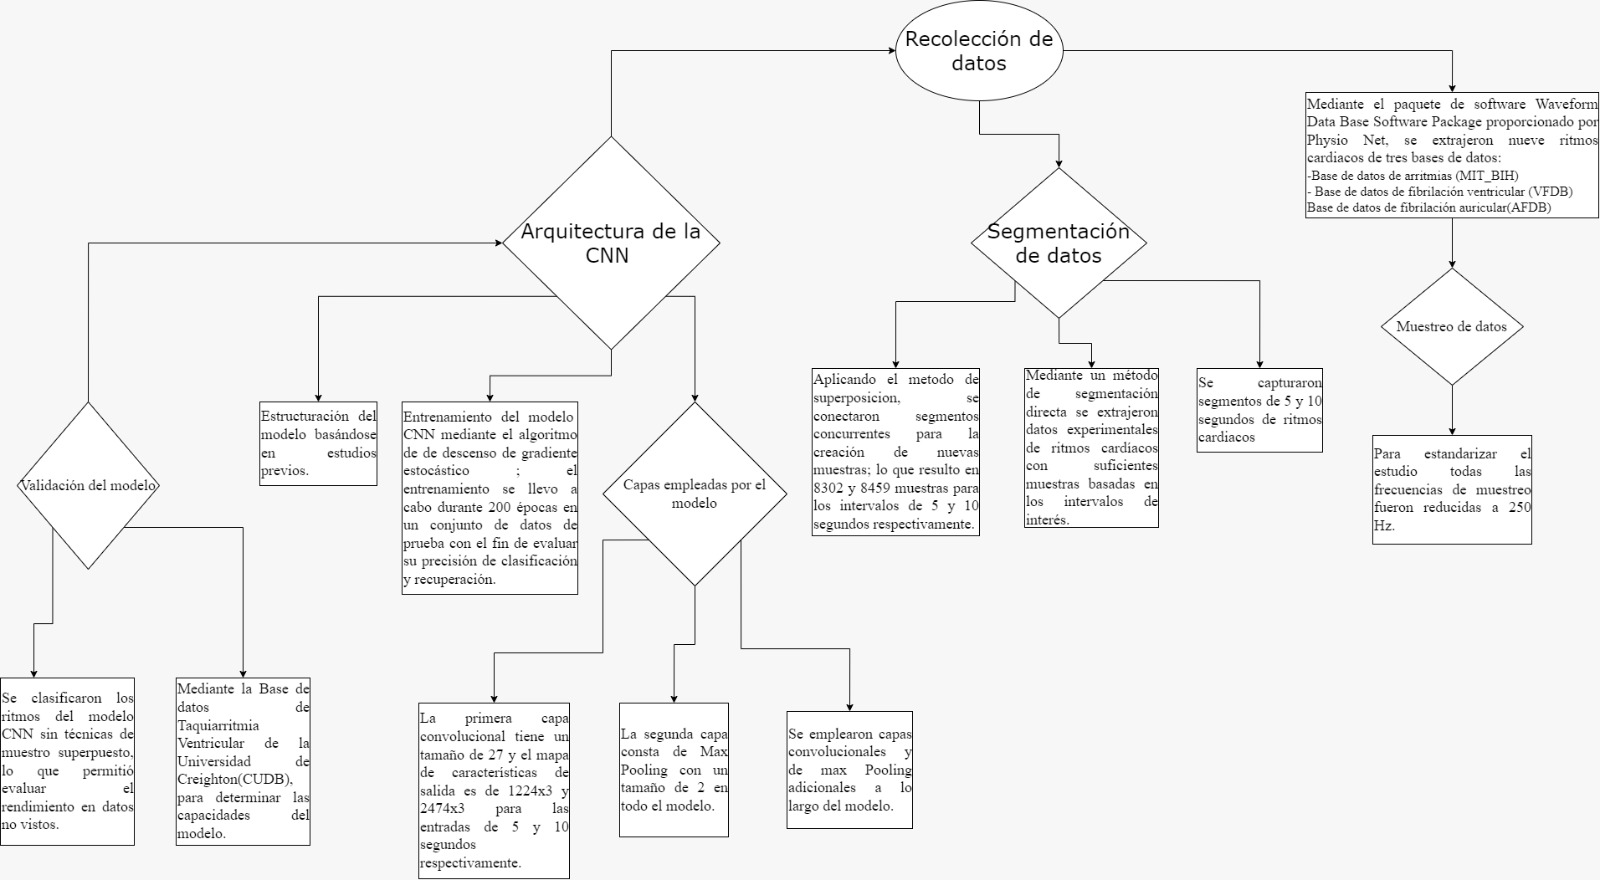

# Detrend

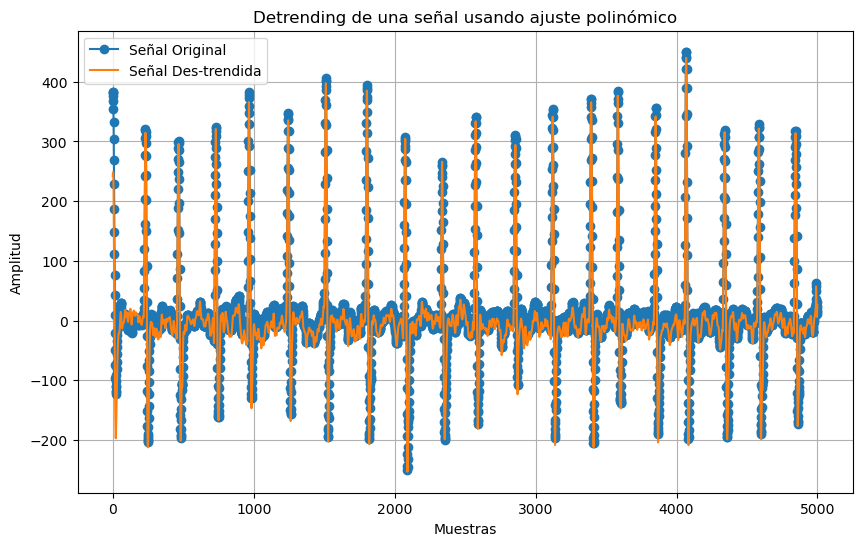

In [2]:
def apply_detrend(x0, n):
    k = len(x0)
    
    t = np.arange(k)
    
    poly_coeffs = np.polyfit(t, x0, n)
    
    trend = np.polyval(poly_coeffs, t)
    
    # Señal detrend es la original menos la tendencia
    xn = x0 - trend
    
    return xn

# Ejemplo de uso:
csv = r'C:\Users\santi\OneDrive\Escritorio\Bioseñales\Proyecto 2\ECGDataDenoised\MUSE_20180113_171327_27000.csv'
df = pd.read_csv(csv, delimiter=',', names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])
x0 = df['II'].values

# Elegimos un valor de n (grado del polinomio)
n = 15

# Aplicar el detrend
xn = apply_detrend(x0, n)

# Visualizar la señal original, la tendencia y la señal des-trendida
plt.figure(figsize=(10, 6))
plt.plot(x0, label='Señal Original', marker='o')
#plt.plot(trend, label=f'Tendencia (grado {n})', linestyle='--')
plt.plot(xn, label='Señal Des-trendida')
plt.legend()
plt.title('Detrending de una señal usando ajuste polinómico')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

# Compresion

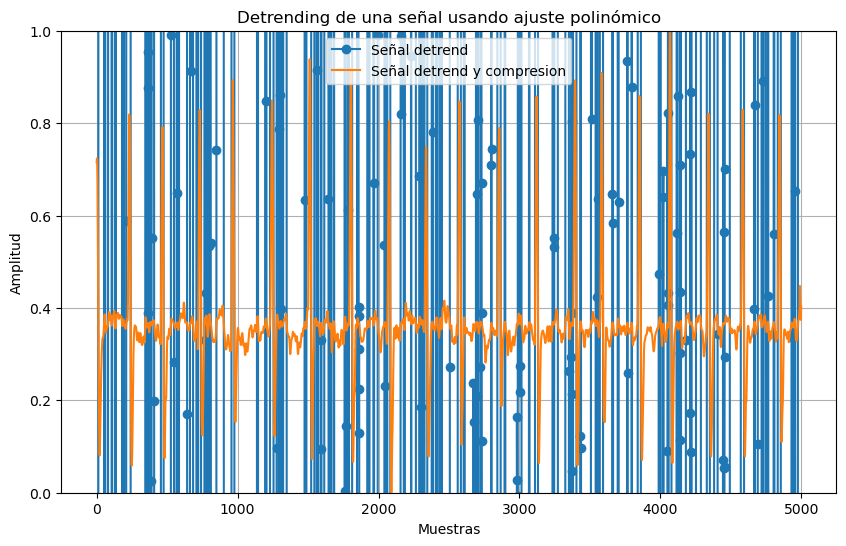

In [3]:
def compression(c_tk, x_min, x_max):
    s_tk = (c_tk - x_min) / (x_max - x_min)
    return s_tk

# Valores mínimo y máximo de la señal original
x_min = np.min(xn)
x_max = np.max(xn)

# Aplicar la compresión
s_tk = compression(xn, x_min, x_max)

# Visualizar la señal original, la tendencia y la señal des-trendida
plt.figure(figsize=(10, 6))
plt.plot(xn, label='Señal detrend', marker='o')
#plt.plot(trend, label=f'Tendencia (grado {n})', linestyle='--')
plt.plot(s_tk, label='Señal detrend y compresion')
plt.legend()
plt.title('Detrending de una señal usando ajuste polinómico')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.ylim([0, 1])
plt.grid(True)
plt.show()

# Se aplica Detrend nuevamente

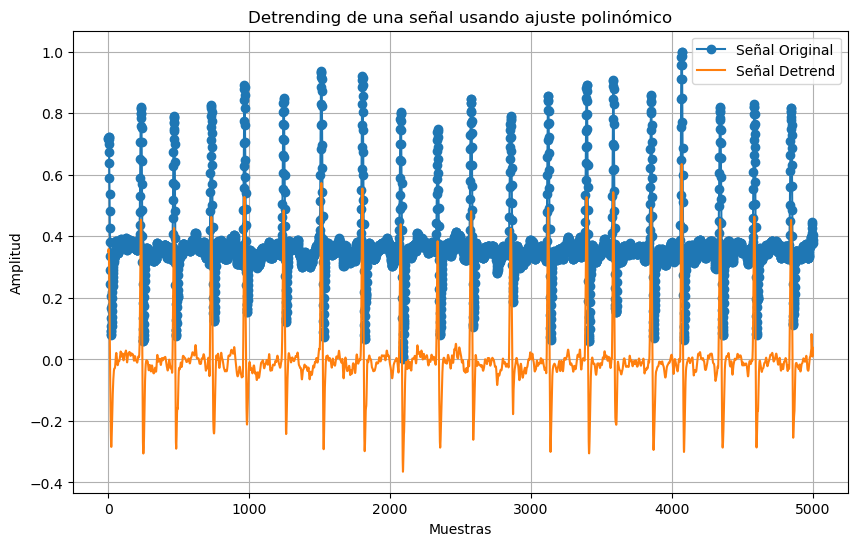

In [5]:
# Nuevamente detrend
XN= apply_detrend(s_tk, n)

# Visualizar la señal original, la tendencia y la señal des-trendida
plt.figure(figsize=(10, 6))
plt.plot(s_tk, label='Señal Original', marker='o')
#plt.plot(trend, label=f'Tendencia (grado {n})', linestyle='--')
plt.plot(XN, label='Señal Detrend')
plt.legend()
plt.title('Detrending de una señal usando ajuste polinómico')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

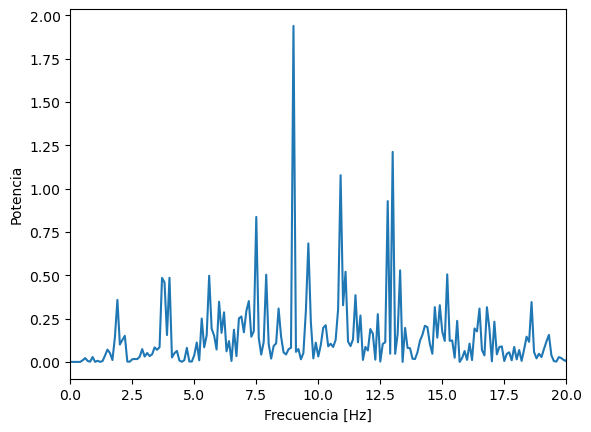

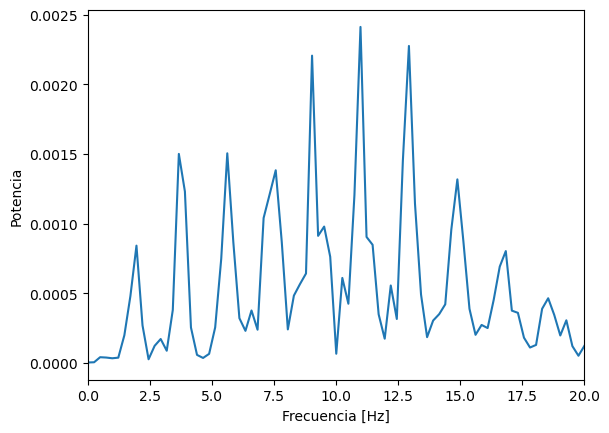

In [6]:
# Densidad de potencia
fs = 500
EKG = fft(XN)
N = XN.shape[0]
f = np.arange(0,fs,fs/N)
plt.plot(f, np.power(np.abs(EKG),2)/N)
plt.xlim([0,20])
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Potencia')
plt.show()

# Periodograma de Welch
f, Pxx_den = welch(XN, fs, nperseg=2048,noverlap=1024)
plt.plot(f, Pxx_den)
plt.xlim([0,20])
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Potencia')
plt.show()

# Biespectro

El biespectro es una herramienta de análisis que pertenece a la familia de los espectros de orden superior (Higher-Order Spectral Analysis, HOSA). Se deriva de la aplicación del concepto de coherencia y correlación a señales no lineales y no gaussianas, permitiendo identificar y caracterizar interacciones de fase entre diferentes componentes de frecuencia en una señal. A diferencia de un espectro de potencia tradicional, que solo mide la distribución de energía a través de diferentes frecuencias, el biespectro analiza la relación entre combinaciones de frecuencias, lo que proporciona información adicional sobre la estructura de fase de la señal y las no linealidades presentes [6].

# Aplicaciones del Biespectro

1. Detección de No Linealidades: El biespectro se utiliza para identificar componentes cuadráticamente acopladas en una señal. Esto lo hace útil para detectar no linealidades en sistemas donde el comportamiento no puede ser explicado solo por análisis lineales.

2. Análisis de Señales Biomédicas: En el análisis de señales como ECG (electrocardiogramas) y EEG (electroencefalogramas), el biespectro ayuda a identificar patrones específicos relacionados con enfermedades, como la fibrilación auricular (AFIB) en el caso de señales ECG. Permite detectar relaciones de fase entre diferentes frecuencias, que pueden ser indicativas de ciertos desórdenes.

3. Detección de Distorsión y Ruido: Se aplica en la identificación de ruido y distorsión en sistemas de comunicación, donde el biespectro puede diferenciar entre componentes no gaussianas del ruido y la señal útil. Esto mejora la calidad del análisis y la corrección de señales en transmisiones digitales.

4. Procesamiento de Señales Marítimas y Geofísicas: En campos como la oceanografía y la geofísica, el biespectro se usa para analizar la interacción entre olas y fenómenos no lineales en datos recogidos de sensores submarinos.

5. Mantenimiento Predictivo: En la industria, el biespectro es útil para la detección de fallos en maquinaria mediante la identificación de patrones anómalos en vibraciones que un análisis de espectro de potencia tradicional podría no detectar.


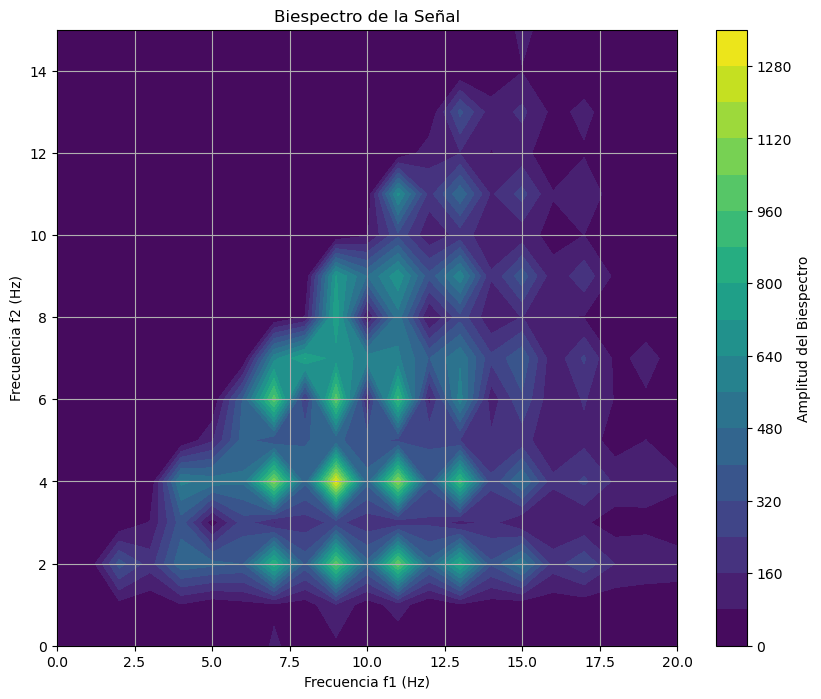

In [7]:
def bispectrum_2d(xn, N=500, sample_rate=500):
    # Dividir la señal en segmentos de tamaño N para la FFT
    segments = len(xn) // N
    bispectrum_matrix = np.zeros((N//2, N//2), dtype=complex)

    # Realizar la FFT para cada segmento
    for segment in range(segments):
        segment_signal = xn[segment * N: (segment + 1) * N]
        X_f = fft(segment_signal, N)
        X_f = X_f[:N//2]  # Tomar solo las frecuencias positivas

        # Calcular el biespectro para combinaciones de f1 y f2
        for i, f1 in enumerate(X_f):
            for j, f2 in enumerate(X_f[i:], start=i):
                f_sum = i + j
                if f_sum < N//2:
                    X_f1 = X_f[i]
                    X_f2 = X_f[j]
                    X_fsum_conj = np.conj(X_f[f_sum])
                    bispectrum_matrix[i, j] += X_f1 * X_f2 * X_fsum_conj
    
    # Promediar sobre el número de segmentos para obtener el biespectro final
    bispectrum_matrix /= segments
    
    # Obtener las frecuencias asociadas
    freqs = np.fft.fftfreq(N, 1 / sample_rate)[:N//2]
    
    # Graficar el biespectro
    plt.figure(figsize=(10, 8))
    plt.contourf(freqs, freqs, np.abs(bispectrum_matrix), levels=20, cmap='viridis')
    plt.colorbar(label='Amplitud del Biespectro')
    plt.title('Biespectro de la Señal')
    plt.xlabel('Frecuencia f1 (Hz)')
    plt.ylabel('Frecuencia f2 (Hz)')
    plt.xlim([0, 20])  # Limitar el eje x para centrarse en las frecuencias más bajas
    plt.ylim([0, 15])  # Limitar el eje y para centrarse en las frecuencias más bajas
    plt.grid(True)
    plt.show()
    
    return bispectrum_matrix, freqs

bispectrum_matrix, freqs = bispectrum_2d(XN, N=500, sample_rate=500)

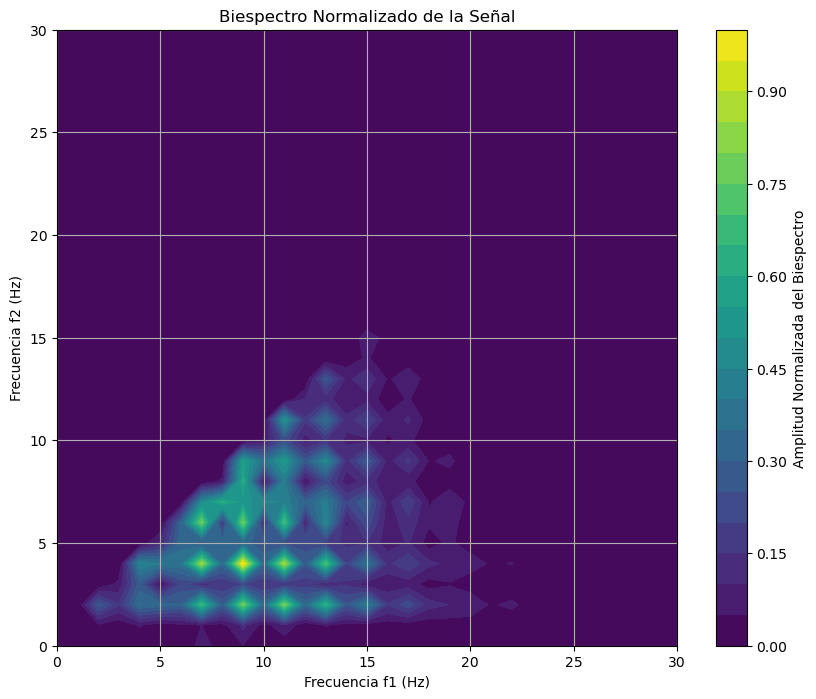

In [8]:
def normalize_bispectrum(bispectrum_matrix):
    abs_bispectrum = np.abs(bispectrum_matrix)
    min_val = np.min(abs_bispectrum)
    max_val = np.max(abs_bispectrum)
    normalized_bispectrum = (abs_bispectrum - min_val) / (max_val - min_val)
    return normalized_bispectrum

def bispectrum_2d_normalized(xn, N=8192, sample_rate=500):

    segments = len(xn) // N
    bispectrum_matrix = np.zeros((N//2, N//2), dtype=complex)

    # Realizar la FFT para cada segmento
    for segment in range(segments):
        segment_signal = xn[segment * N: (segment + 1) * N]
        X_f = fft(segment_signal, N)
        X_f = X_f[:N//2]  # Tomar solo las frecuencias positivas

        # Calcular el biespectro para combinaciones de f1 y f2
        for i, f1 in enumerate(X_f):
            for j, f2 in enumerate(X_f[i:], start=i):
                f_sum = i + j
                if f_sum < N//2:
                    X_f1 = X_f[i]
                    X_f2 = X_f[j]
                    X_fsum_conj = np.conj(X_f[f_sum])
                    bispectrum_matrix[i, j] += X_f1 * X_f2 * X_fsum_conj
    
    # Promediar sobre el número de segmentos para obtener el biespectro final
    bispectrum_matrix /= segments
    
    # Normalizar el biespectro
    normalized_bispectrum = normalize_bispectrum(bispectrum_matrix)
    
    # Obtener las frecuencias asociadas
    freqs = np.fft.fftfreq(N, 1 / sample_rate)[:N//2]
    
    # Graficar el biespectro normalizado
    plt.figure(figsize=(10, 8))
    plt.contourf(freqs, freqs, normalized_bispectrum, levels=20, cmap='viridis')
    plt.colorbar(label='Amplitud Normalizada del Biespectro')
    plt.title('Biespectro Normalizado de la Señal')
    plt.xlabel('Frecuencia f1 (Hz)')
    plt.ylabel('Frecuencia f2 (Hz)')
    plt.xlim([0, 30])  # Limitar el eje x para centrarse en las frecuencias más bajas
    plt.ylim([0, 30])  # Limitar el eje y para centrarse en las frecuencias más bajas
    plt.grid(True)
    plt.show()
    
    return normalized_bispectrum, freqs

# Ejemplo de uso con la señal xn:
# Graficar el biespectro normalizado de xn
normalized_bispectrum, freqs = bispectrum_2d_normalized(XN, N=500, sample_rate=500)

In [9]:
def bicoherence(X_f1, X_f2, X_f1_f2_conj):
    numerador = np.abs(np.sum(X_f1 * X_f2 * X_f1_f2_conj))**2
    denominador = np.sum(np.abs(X_f1 * X_f2 * X_f1_f2_conj))**2
    B_f1_f2 = numerador / denominador
    return B_f1_f2

# Assume xn is your detrended and compressed ECG signal
X_f1 = np.fft.fft(XN)
X_f2 = np.fft.fft(XN)
X_f1_f2_conj = np.conj(X_f1 * X_f2)

# Calculate bispectrum and bicoherence
#b_f1_f2 = bispectrum(X_f1, X_f2, X_f1_f2_conj)
B_f1_f2 = bicoherence(X_f1, X_f2, X_f1_f2_conj)
#bic_sim = np.zeros((20,20))
#for f1 in range(20):
#    for f2 in range(f1, 20-f1):
#        bic_sim[f1,f2] = B_f1_f2[f1,f2]
        


print(B_f1_f2)

1.0000000000000009


# Extraer señales de interes en diccionarios AFIB y SB

In [9]:
def extract_filenames_with_rhythm(excel_path, AFIB_rhythms=['AFIB'], SB_rhythms=['SB']):
    # Leer el archivo Excel
    df = pd.read_excel(excel_path)
    
    # Filtrar por los ritmos deseados
    AFIB_df = df[df['Rhythm'].isin(AFIB_rhythms)]
    SB_df = df[df['Rhythm'].isin(SB_rhythms)]
    
    # Extraer los valores de la columna 'FileName'
    AFIB = AFIB_df['FileName'].values.tolist()
    SB = SB_df['FileName'].values.tolist()
    
    return AFIB, SB

def read_ecg_files(AFIB, SB, folder_path):
    AFIB_data = {}
    for file_name in AFIB:
        file_path = os.path.join(folder_path, f"{file_name}.csv")
        
        # Verificar si el archivo existe
        if os.path.exists(file_path):
            # Leer el archivo .csv
            df = pd.read_csv(file_path, delimiter=',', names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])
            
            # Guardar los datos de la columna 'II'
            AFIB_data[file_name] = df['II'].values
        else:
            print(f"Archivo {file_path} no encontrado.")
            
    SB_data = {}
    for file_name in SB:
        file_path = os.path.join(folder_path, f"{file_name}.csv")
        
        # Verificar si el archivo existe
        if os.path.exists(file_path):
            # Leer el archivo .csv
            df = pd.read_csv(file_path, delimiter=',', names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])
            
            # Guardar los datos de la columna 'II'
            SB_data[file_name] = df['II'].values
        else:
            print(f"Archivo {file_path} no encontrado.")
    
    return AFIB_data, SB_data

# Ruta al archivo Excel y a la carpeta de archivos .csv

excel_path = r'C:\Users\santi\OneDrive\Escritorio\Bioseñales\Proyecto 2\Diagnostics.xlsx'
csv_folder_path = r'C:\Users\santi\OneDrive\Escritorio\Bioseñales\Proyecto 2\ECGDataDenoised'

# Extraer los nombres de archivos que nos interesan
AFIB, SB = extract_filenames_with_rhythm(excel_path)

# Leer los archivos .csv correspondientes y extraer la columna 'II'
AFIB_values, SB_values = read_ecg_files(AFIB, SB, csv_folder_path)

# `ecg_values` es un diccionario donde cada clave es el nombre del archivo y el valor son los datos de la columna 'II'.

# Diccionarios con las señales procesadas para AFIB y SB

In [10]:
# Diccionarios para almacenar las señales procesadas
AFIB_xn = {}
SB_xn = {}

# Procesar las señales de AFIB
for name, signal in AFIB_values.items():
    # 1. Aplicar detrend inicial
    signal_detrended = apply_detrend(signal, n=15)
    
    # 2. Aplicar compresión
    x_min = np.min(signal_detrended)
    x_max = np.max(signal_detrended)
    compressed_signal = compression(signal_detrended, x_min, x_max)
    
    # 3. Aplicar detrend nuevamente sobre la señal comprimida
    processed_signal = apply_detrend(compressed_signal, n=15)
    
    # Guardar en el diccionario correspondiente
    AFIB_xn[name] = processed_signal

# Procesar las señales de SB
for name, signal in SB_values.items():
    # 1. Aplicar detrend inicial
    signal_detrended = apply_detrend(signal, n=15)
    
    # 2. Aplicar compresión
    x_min = np.min(signal_detrended)
    x_max = np.max(signal_detrended)
    compressed_signal = compression(signal_detrended, x_min, x_max)
    
    # 3. Aplicar detrend nuevamente sobre la señal comprimida
    processed_signal = apply_detrend(compressed_signal, n=15)
    
    # Guardar en el diccionario correspondiente
    SB_xn[name] = processed_signal

# Ahora AFIB_xn y SB_xn contienen las señales procesadas de cada tipo
#print("AFIB_xn:", list(AFIB_xn.keys()))
#print("SB_xn:", list(SB_xn.keys()))

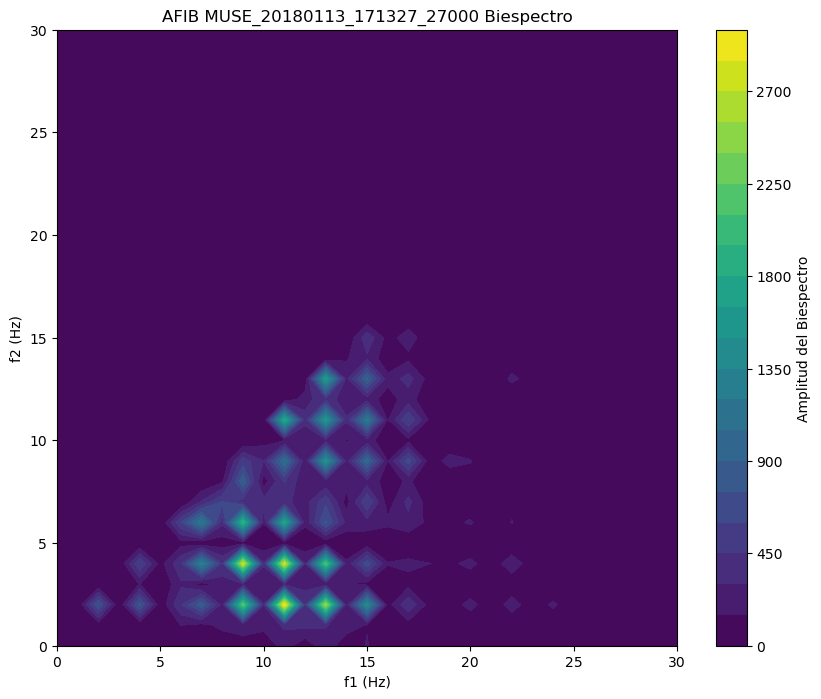

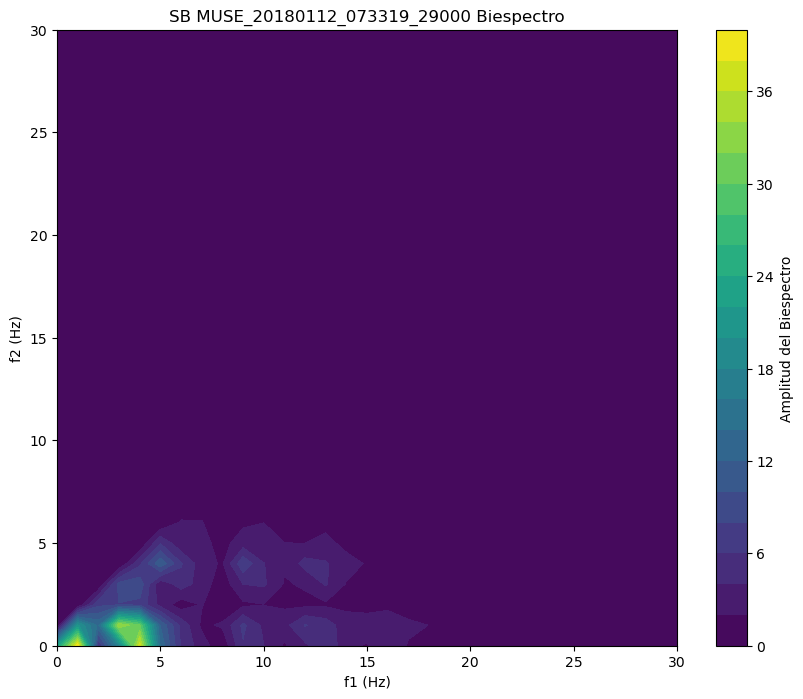

                     Registro Estado   fMP   sFSB
0  MUSE_20180113_171327_27000   AFIB  13.0  15875
1  MUSE_20180112_073319_29000     SB   1.0  15875


In [13]:
def compute_bispectrum_bicoherence(signal, N=500, sample_rate=500):
    X_f = fft(signal, N)
    X_f = X_f[:N//2]
    freqs = fftfreq(N, 1/sample_rate)[:N//2]

    bispectrum = np.zeros((len(freqs), len(freqs)), dtype=complex)
    bicoherence = np.zeros((len(freqs), len(freqs)))

    significance_threshold = np.sqrt(9.2 / (2 * N))

    for i, f1 in enumerate(freqs):
        for j, f2 in enumerate(freqs[i:], start=i):
            f_sum = f1 + f2
            if f_sum <= sample_rate / 2:
                X_f1 = X_f[i]
                X_f2 = X_f[j]
                idx_sum = np.argmin(np.abs(freqs - f_sum))
                X_fsum = np.conj(X_f[idx_sum])
                
                bispectrum[i, j] = X_f1 * X_f2 * X_fsum

                numerator = np.abs(np.sum(X_f1 * X_f2 * X_fsum))**2
                denominator = np.sum(np.abs(X_f1 * X_f2)**2 * np.abs(X_fsum)**2)
                B_f1_f2 = numerator / denominator if denominator != 0 else 0
                bicoherence[i, j] = B_f1_f2

    # Filtrar la bicoherencia por el umbral de significancia
    significant_bicoherence = bicoherence > significance_threshold
    sFSB = np.sum(significant_bicoherence)

    return freqs, bispectrum, sFSB

def plot_bispectrum(freqs, bispectrum, title_prefix=''):
    plt.figure(figsize=(10, 8))
    plt.contourf(freqs, freqs, np.abs(bispectrum), levels=20, cmap='viridis')
    plt.colorbar(label='Amplitud del Biespectro')
    plt.title(f'{title_prefix} Biespectro')
    plt.xlabel('f1 (Hz)')
    plt.ylabel('f2 (Hz)')
    plt.xlim([0, 30])
    plt.ylim([0, 30])
    #plt.clim(0, 1)  # Limitar la magnitud a valores entre 0 y 1
    plt.show()

def extract_fmp(signal, N=500, sample_rate=500):
    X_f = fft(signal, N)
    X_f = X_f[:N//2]
    freqs = fftfreq(N, 1/sample_rate)[:N//2]
    power_spectrum = np.abs(X_f) ** 2
    fMP = freqs[np.argmax(power_spectrum)]
    return fMP

def process_signals(AFIB_xn, SB_xn):
    results = []

    # Seleccionar una señal de cada tipo (ejemplo)
    AFIB_name, AFIB_signal = next(iter(AFIB_xn.items()))
    SB_name, SB_signal = next(iter(SB_xn.items()))

    # Calcular y graficar el biespectro para AFIB
    afib_freqs, afib_bispectrum, afib_sFSB = compute_bispectrum_bicoherence(AFIB_signal)
    plot_bispectrum(afib_freqs, afib_bispectrum, title_prefix=f'AFIB {AFIB_name}')
    afib_fMP = extract_fmp(AFIB_signal)

    # Calcular y graficar el biespectro para SB
    sb_freqs, sb_bispectrum, sb_sFSB = compute_bispectrum_bicoherence(SB_signal)
    plot_bispectrum(sb_freqs, sb_bispectrum, title_prefix=f'SB {SB_name}')
    sb_fMP = extract_fmp(SB_signal)

    # Almacenar los resultados en el DataFrame
    results.append({'Registro': AFIB_name, 'Estado': 'AFIB', 'fMP': afib_fMP, 'sFSB': afib_sFSB})
    results.append({'Registro': SB_name, 'Estado': 'SB', 'fMP': sb_fMP, 'sFSB': sb_sFSB})

    # Crear DataFrame
    results_df = pd.DataFrame(results, columns=['Registro', 'Estado', 'fMP', 'sFSB'])

    return results_df

# Procesar las señales
results_df = process_signals(AFIB_xn, SB_xn)

# Mostrar los resultados
print(results_df)


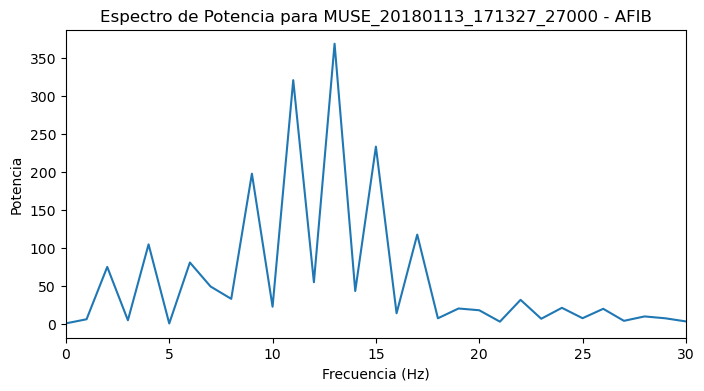

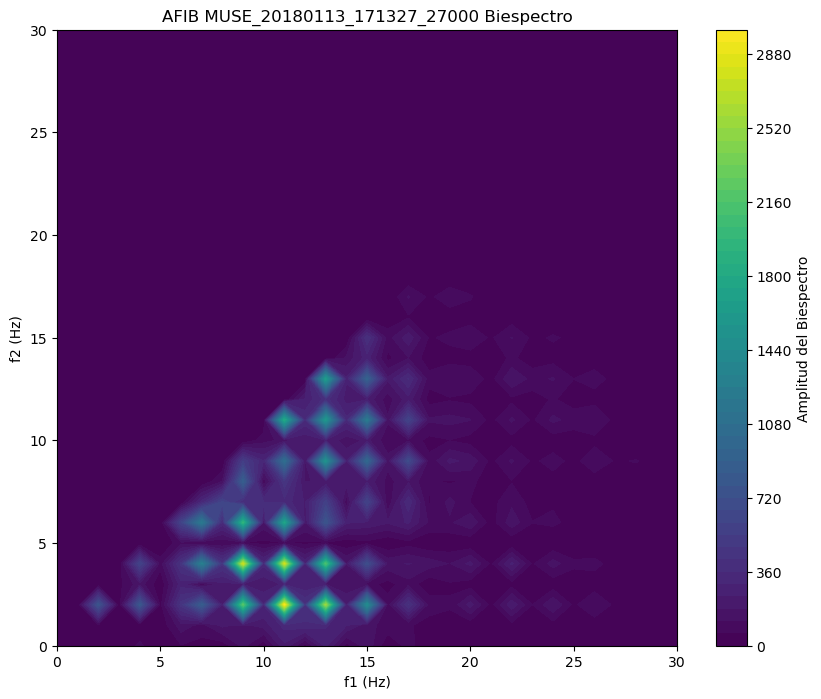

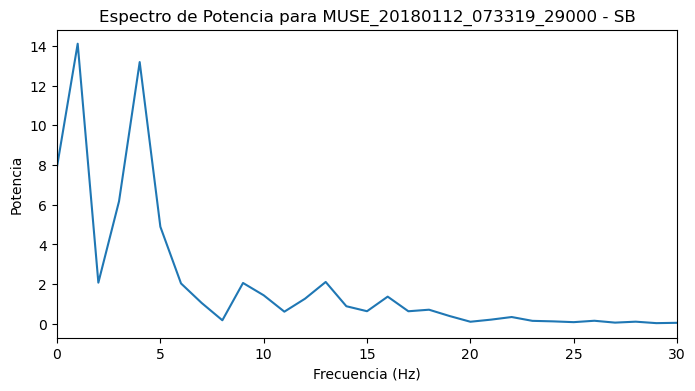

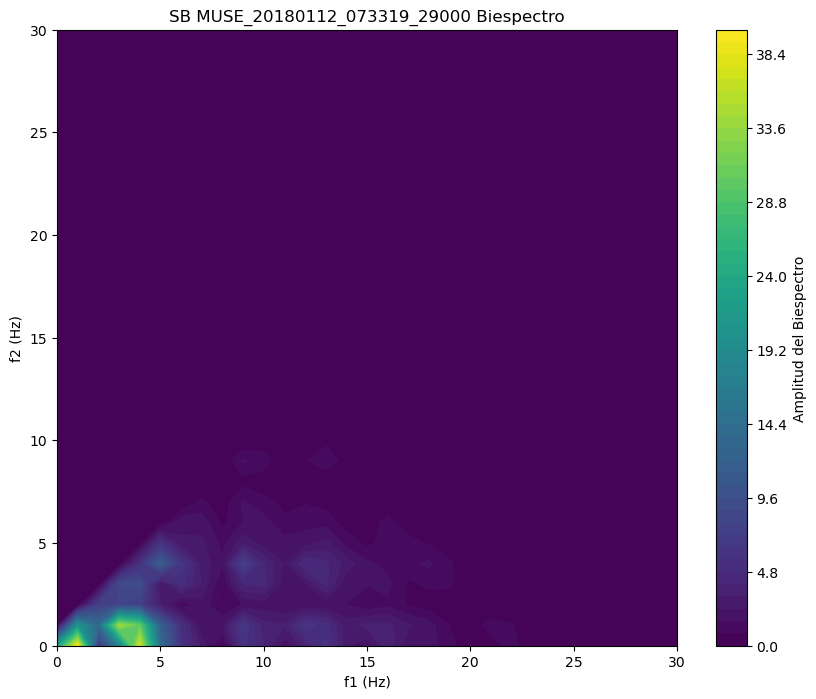

In [14]:
def compute_bispectrum_bicoherence(signal, N=500, sample_rate=500):
    X_f = fft(signal, N)
    X_f = X_f[:N//2]
    freqs = fftfreq(N, 1/sample_rate)[:N//2]

    bispectrum = np.zeros((len(freqs), len(freqs)), dtype=complex)
    bicoherence = np.zeros((len(freqs), len(freqs)))

    significance_threshold = np.sqrt(9.2 / (2 * N))

    for i, f1 in enumerate(freqs):
        for j, f2 in enumerate(freqs[i:], start=i):
            f_sum = f1 + f2
            if f_sum <= sample_rate / 2:
                X_f1 = X_f[i]
                X_f2 = X_f[j]
                idx_sum = np.argmin(np.abs(freqs - f_sum))
                X_fsum = np.conj(X_f[idx_sum])
                
                bispectrum[i, j] = X_f1 * X_f2 * X_fsum

                numerator = np.abs(np.sum(X_f1 * X_f2 * X_fsum))**2
                denominator = np.sum(np.abs(X_f1 * X_f2)**2 * np.abs(X_fsum)**2)
                B_f1_f2 = numerator / denominator if denominator != 0 else 0
                bicoherence[i, j] = B_f1_f2

    # Filtrar la bicoherencia por el umbral de significancia
    significant_bicoherence = bicoherence > significance_threshold
    sFSB = np.sum(significant_bicoherence)

    return freqs, bispectrum, sFSB

def plot_bispectrum(freqs, bispectrum, title_prefix=''):
    plt.figure(figsize=(10, 8))
    plt.contourf(freqs, freqs, np.abs(bispectrum), levels=50, cmap='viridis')
    plt.colorbar(label='Amplitud del Biespectro')
    plt.title(f'{title_prefix} Biespectro')
    plt.xlabel('f1 (Hz)')
    plt.ylabel('f2 (Hz)')
    plt.xlim([0, 30])
    plt.ylim([0, 30])
    #plt.clim(0, 1)  # Limitar la magnitud a valores entre 0 y 1
    plt.show()

def extract_fmp(signal, N=500, sample_rate=500):
    X_f = fft(signal, N)
    X_f = X_f[:N//2]
    freqs = fftfreq(N, 1/sample_rate)[:N//2]
    power_spectrum = np.abs(X_f) ** 2
    fMP = freqs[np.argmax(power_spectrum)]
    return fMP, freqs, power_spectrum

def process_all_signals(AFIB_xn, SB_xn):
    results = []

    # Procesar todas las señales de AFIB
    for AFIB_name, AFIB_signal in AFIB_xn.items():
        afib_fMP, afib_freqs, afib_power_spectrum = extract_fmp(AFIB_signal)
        _, afib_bispectrum, afib_sFSB = compute_bispectrum_bicoherence(AFIB_signal)

        # Almacenar los resultados en el DataFrame
        results.append({'Registro': AFIB_name, 'Estado': 'AFIB', 'fMP': afib_fMP, 'sFSB': afib_sFSB})

        # Graficar la frecuencia de máxima potencia y el biespectro para una señal (solo la primera)
        if len(results) == 1:  # Solo graficar para el primer caso de AFIB
            plt.figure(figsize=(8, 4))
            plt.plot(afib_freqs, afib_power_spectrum)
            plt.title(f'Espectro de Potencia para {AFIB_name} - AFIB')
            plt.xlabel('Frecuencia (Hz)')
            plt.ylabel('Potencia')
            plt.xlim([0, 30])
            plt.show()
            plot_bispectrum(afib_freqs, afib_bispectrum, title_prefix=f'AFIB {AFIB_name}')

    # Procesar todas las señales de SB
    for SB_name, SB_signal in SB_xn.items():
        sb_fMP, sb_freqs, sb_power_spectrum = extract_fmp(SB_signal)
        _, sb_bispectrum, sb_sFSB = compute_bispectrum_bicoherence(SB_signal)

        # Almacenar los resultados en el DataFrame
        results.append({'Registro': SB_name, 'Estado': 'SB', 'fMP': sb_fMP, 'sFSB': sb_sFSB})

        # Graficar la frecuencia de máxima potencia y el biespectro para una señal (solo la primera)
        if len(results) == len(AFIB_xn) + 1:  # Solo graficar para el primer caso de SB
            plt.figure(figsize=(8, 4))
            plt.plot(sb_freqs, sb_power_spectrum)
            plt.title(f'Espectro de Potencia para {SB_name} - SB')
            plt.xlabel('Frecuencia (Hz)')
            plt.ylabel('Potencia')
            plt.xlim([0, 30])
            plt.show()
            plot_bispectrum(sb_freqs, sb_bispectrum, title_prefix=f'SB {SB_name}')

    # Crear DataFrame con los resultados
    results_df = pd.DataFrame(results, columns=['Registro', 'Estado', 'fMP', 'sFSB'])
    
    return results_df

# Procesar las señales
results_df = process_all_signals(AFIB_xn, SB_xn)

In [15]:
results_df

,Registro,Estado,fMP,sFSB
0,MUSE_20180113_171327_27000,AFIB,13.0,15875
1,MUSE_20180114_075026_69000,AFIB,5.0,15875
2,MUSE_20180113_133901_16000,AFIB,3.0,15875
3,MUSE_20180116_123940_90000,AFIB,12.0,15875
4,MUSE_20180114_075003_61000,AFIB,11.0,15875
...,...,...,...,...
5664,MUSE_20180114_070348_17000,SB,8.0,15875
5665,MUSE_20180114_134724_10000,SB,4.0,15875
5666,MUSE_20180113_122544_20000,SB,4.0,15875
5667,MUSE_20180114_074720_85000,SB,11.0,15875


# Analisis estadistico

In [17]:
#results = pd.DataFrame(results_df)

# Dividir los datos por estado
afib_data = results_df[results_df['Estado'] == 'AFIB']
sb_data = results_df[results_df['Estado'] == 'SB']

# Estadísticas descriptivas para cada grupo
print("Estadísticas Descriptivas AFIB:")
print(afib_data[['fMP', 'sFSB']].describe())

print("\nEstadísticas Descriptivas SB:")
print(sb_data[['fMP', 'sFSB']].describe())

Estadísticas Descriptivas AFIB:
               fMP     sFSB
count  1780.000000   1780.0
mean      4.878652  15875.0
std       3.118585      0.0
min       1.000000  15875.0
25%       3.000000  15875.0
50%       4.000000  15875.0
75%       6.000000  15875.0
max      50.000000  15875.0

Estadísticas Descriptivas SB:
               fMP     sFSB
count  3889.000000   3889.0
mean      4.359733  15875.0
std       2.638340      0.0
min       0.000000  15875.0
25%       3.000000  15875.0
50%       4.000000  15875.0
75%       5.000000  15875.0
max      50.000000  15875.0


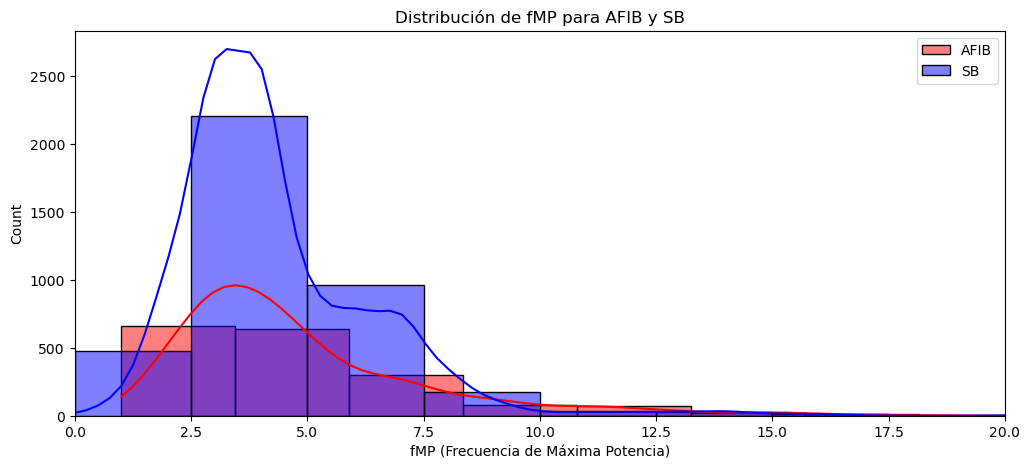

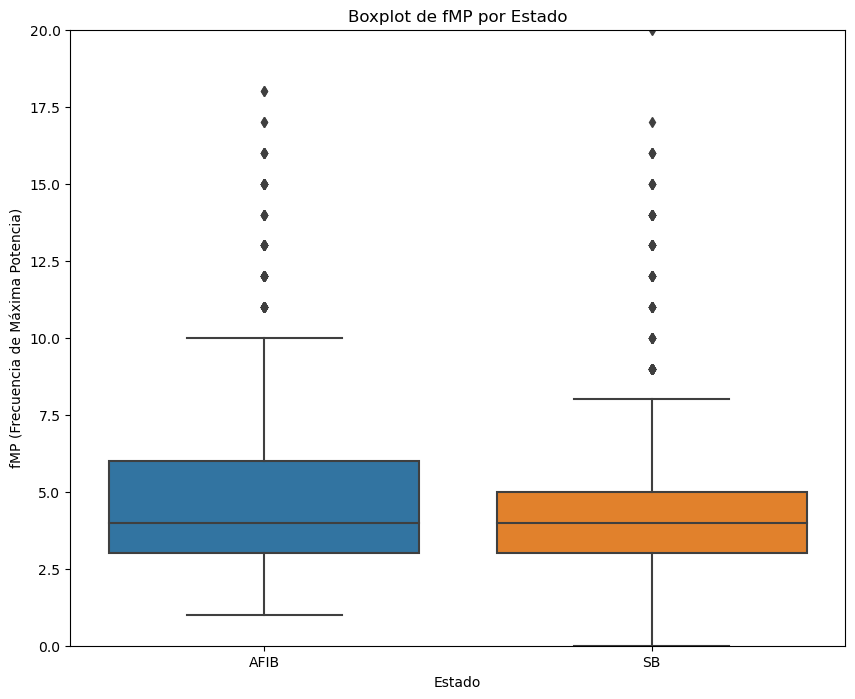

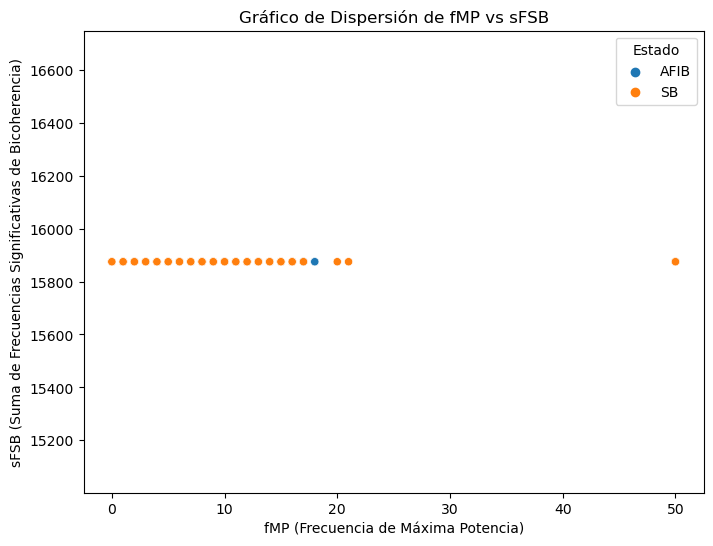

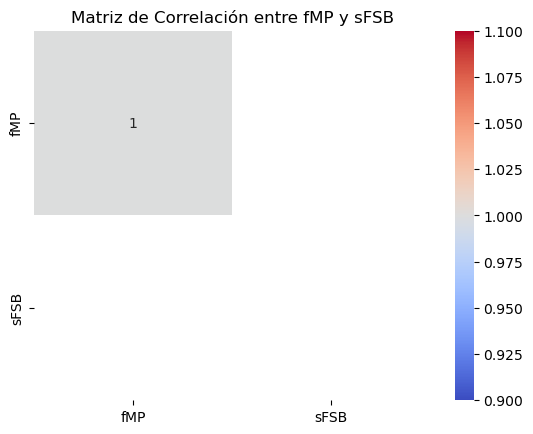

In [23]:
# Histograma y gráficos de densidad para fMP
plt.figure(figsize=(12, 5))
sns.histplot(afib_data['fMP'], kde=True, color='red', label='AFIB', bins=20)
sns.histplot(sb_data['fMP'], kde=True, color='blue', label='SB', bins=20)
plt.title('Distribución de fMP para AFIB y SB')
plt.xlabel('fMP (Frecuencia de Máxima Potencia)')
plt.xlim(0, 20)
plt.legend()
plt.show()

# Boxplot para comparar fMP entre AFIB y SB
plt.figure(figsize=(10, 8))
sns.boxplot(data=results_df, x='Estado', y='fMP')
plt.title('Boxplot de fMP por Estado')
plt.xlabel('Estado')
plt.ylabel('fMP (Frecuencia de Máxima Potencia)')
plt.ylim(0, 20)
plt.show()

# Gráficos de dispersión de fMP vs sFSB
plt.figure(figsize=(8, 6))
sns.scatterplot(data=results_df, x='fMP', y='sFSB', hue='Estado')
plt.title('Gráfico de Dispersión de fMP vs sFSB')
plt.xlabel('fMP (Frecuencia de Máxima Potencia)')
plt.ylabel('sFSB (Suma de Frecuencias Significativas de Bicoherencia)')
plt.show()

# Matriz de correlación con heatmap
correlation_matrix = results_df[['fMP', 'sFSB']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación entre fMP y sFSB')
plt.show()

In [19]:
# Pruebas de normalidad para fMP
shapiro_afib_fmp = shapiro(afib_data['fMP'])
shapiro_sb_fmp = shapiro(sb_data['fMP'])

print("Prueba de Shapiro-Wilk para fMP - AFIB:", shapiro_afib_fmp)
print("Prueba de Shapiro-Wilk para fMP - SB:", shapiro_sb_fmp)

# Pruebas de normalidad para sFSB
shapiro_afib_sfsb = shapiro(afib_data['sFSB'])
shapiro_sb_sfsb = shapiro(sb_data['sFSB'])

print("\nPrueba de Shapiro-Wilk para sFSB - AFIB:", shapiro_afib_sfsb)
print("Prueba de Shapiro-Wilk para sFSB - SB:", shapiro_sb_sfsb)

Prueba de Shapiro-Wilk para fMP - AFIB: ShapiroResult(statistic=0.7157055748441532, pvalue=8.846479354978976e-48)
Prueba de Shapiro-Wilk para fMP - SB: ShapiroResult(statistic=0.6108475078107001, pvalue=3.963436348052861e-69)

Prueba de Shapiro-Wilk para sFSB - AFIB: ShapiroResult(statistic=1.0, pvalue=1.0)
Prueba de Shapiro-Wilk para sFSB - SB: ShapiroResult(statistic=1.0, pvalue=1.0)


C:\Users\santi\AppData\Roaming\Python\Python311\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


In [20]:
# Prueba t para fMP (si ambos son normales)
t_stat_fmp, p_value_fmp = ttest_ind(afib_data['fMP'], sb_data['fMP'])
print("\nPrueba t para fMP entre AFIB y SB:")
print(f"T-statistic: {t_stat_fmp}, P-value: {p_value_fmp}")

# Prueba Mann-Whitney U para fMP (si no son normales)
u_stat_fmp, p_value_mwu_fmp = mannwhitneyu(afib_data['fMP'], sb_data['fMP'])
print("\nPrueba Mann-Whitney U para fMP entre AFIB y SB:")
print(f"U-statistic: {u_stat_fmp}, P-value: {p_value_mwu_fmp}")

# Pruebas similares para sFSB
t_stat_sfsb, p_value_sfsb = ttest_ind(afib_data['sFSB'], sb_data['sFSB'])
print("\nPrueba t para sFSB entre AFIB y SB:")
print(f"T-statistic: {t_stat_sfsb}, P-value: {p_value_sfsb}")

u_stat_sfsb, p_value_mwu_sfsb = mannwhitneyu(afib_data['sFSB'], sb_data['sFSB'])
print("\nPrueba Mann-Whitney U para sFSB entre AFIB y SB:")
print(f"U-statistic: {u_stat_sfsb}, P-value: {p_value_mwu_sfsb}")


Prueba t para fMP entre AFIB y SB:
T-statistic: 6.4808088141782845, P-value: 9.893894859852159e-11

Prueba Mann-Whitney U para fMP entre AFIB y SB:
U-statistic: 3748596.0, P-value: 2.8533208723394545e-07

Prueba t para sFSB entre AFIB y SB:
T-statistic: nan, P-value: nan

Prueba Mann-Whitney U para sFSB entre AFIB y SB:
U-statistic: 3461210.0, P-value: 1.0


C:\Users\santi\AppData\Roaming\Python\Python311\site-packages\scipy\stats\_axis_nan_policy.py:573: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


# Resultados

El análisis de resultados refleja diferencias marcadas en las características espectrales y estadísticas de las señales de electrocardiograma (ECG) de pacientes con fibrilación auricular (AFIB) y ritmo sinusal (SB). 

# Comparación de los Espectros de Potencia

Los espectros de potencia revelan que, en el sujeto con AFIB, la densidad de potencia es mayor en el rango de frecuencias de 10 a 15 Hz, alcanzando un pico significativo de aproximadamente 350 unidades de potencia. Esto indica la presencia de actividad en una banda de frecuencia que es inusual para un ritmo sinusal, y puede ser indicativo de la naturaleza desorganizada de los impulsos eléctricos durante la fibrilación auricular, donde los impulsos eléctricos no son coordinados. En comparación, el sujeto con SB muestra un pico de potencia significativo en las frecuencias bajas, específicamente entre 0 y 5 Hz, con un valor máximo cercano a 14 unidades de potencia. Esto se alinea con estudios previos que indican que los pacientes con AFIB suelen mostrar un mayor componente de potencia en frecuencias superiores a las observadas en sujetos con ritmo sinusal (SB), donde las frecuencias bajas son típicas de la actividad cardíaca regular y bien organizada de un ritmo sinusal [7] [8]. El sujeto con ritmo sinusal (SB) mostró que las mayores potencias estaban concentradas entre 0 y 5 Hz, con un pico máximo de 14 unidades de potencia poco después de 0 Hz. Esto es característico de una actividad rítmica más regular, reflejando una señal ECG donde la variabilidad en las frecuencias es menor. La concentración de potencia en frecuencias bajas está asociada con la estabilidad del ritmo cardíaco y la predominancia de la actividad del nodo sinusal, como se ha documentado en estudios de análisis de señales ECG normales [9].

# Análisis Biespectro

El biespectro muestra un comportamiento más complejo en el caso de AFIB, donde la forma triangular de la gráfica es más marcada y presenta mayor amplitud en el rango de 10 a 15 Hz. Esto sugiere la existencia de interacciones no lineales más fuertes en esta región de frecuencia, lo cual es consistente con la presencia de arrítmias complejas en la fibrilación auricular. Estudios previos han demostrado que el biespectro puede ser un indicador útil para detectar no linealidades en señales ECG y que la fibrilación auricular presenta características de alta irregularidad no lineal [6]. En contraste, el biespectro del sujeto SB mostró mayores amplitudes en el rango de 0 a 5 Hz, lo que sugiere una actividad más predecible y con menor grado de no linealidad. La literatura sugiere que los ritmos sinusales tienden a tener una representación biespectral más simple, lo que concuerda con el resultado observado en este estudio.

# Análisis graficos

El histograma en la parte superior de la imagen compara la distribución de la fMP entre los sujetos con AFIB y aquellos con ritmo sinusal (SB):

Distribución de AFIB (rojo): Se observa una distribución con mayor amplitud, lo que indica una variabilidad más amplia en las frecuencias de máxima potencia. Esto sugiere que la fMP en los sujetos con AFIB es menos uniforme y presenta un rango más amplio de frecuencias dominantes. Esto puede ser interpretado como un reflejo de la naturaleza irregular y caótica de la actividad eléctrica durante la fibrilación auricular.

Distribución de SB (azul): La distribución es más estrecha y concentrada, con un pico más pronunciado alrededor de frecuencias bajas (aproximadamente 4 Hz). Esto sugiere que los sujetos con ritmo sinusal tienen una fMP más consistente, centrada en frecuencias más bajas, lo que es indicativo de un ritmo cardíaco más regular y estable. Este resultado es esperado, ya que en ritmos sinusales el comportamiento del sistema cardiovascular es más predecible [8].

Se evidencia una superposición de las distribuciones, pero la cola derecha (hacia frecuencias más altas) es más prominente en AFIB, lo que refleja que en algunos casos, la fMP en AFIB puede alcanzar valores más altos. Esto concuerda con la literatura que señala la desorganización eléctrica en AFIB como un fenómeno que se expresa en una gama más amplia de frecuencias [7].

El gráfico de cajas y bigotes (boxplot) compara la distribución de la fMP entre los estados AFIB y SB de forma más detallada, la mediana de la fMP para ambos grupos es similar, alrededor de 4 Hz. Sin embargo, la mediana en sí misma no refleja toda la variabilidad, ya que se ven diferencias significativas en la dispersión de los datos. El IQR de AFIB es más amplio, lo que indica una mayor variabilidad entre el primer y tercer cuartil. Esto muestra que la mayoría de los valores de fMP en AFIB están más dispersos en comparación con SB. Esto respalda el concepto de que la fibrilación auricular presenta una mayor diversidad en las frecuencias que pueden dominar la señal ECG [7]. Ambos grupos presentan outliers, pero son más numerosos en el caso de AFIB. Los valores atípicos de AFIB alcanzan frecuencias más altas, lo que coincide con la presencia de eventos con frecuencias dominantes más elevadas en algunos episodios de fibrilación auricular. La presencia de estos outliers en ambos grupos indica que, aunque la mayoría de los sujetos siguen el patrón típico de cada estado, hay episodios donde las frecuencias de máxima potencia pueden variar significativamente. La mayor dispersión de la fMP en AFIB observada en el boxplot refuerza la idea de que, a pesar de tener una mediana similar a la de SB, la variabilidad en la señal de AFIB es considerablemente mayor. Esto puede deberse a la naturaleza impredecible y desorganizada de la AFIB, donde las diferentes partes de la señal ECG pueden generar máximos de potencia a frecuencias variadas.

# Análisis estadístico

En términos de la frecuencia de máxima potencia (fMP), el grupo AFIB presenta una media de 4.88 Hz, mientras que el grupo SB tiene una media de 4.36 Hz. Aunque la diferencia en la media no parece ser grande, la desviación estándar en el grupo AFIB (3.12 Hz) es notablemente mayor que en el grupo SB (2.64 Hz), lo que sugiere una mayor variabilidad de la fMP en la fibrilación auricular. Esto puede estar relacionado con la variabilidad intrínseca del ritmo caótico de la AFIB, que provoca fluctuaciones más amplias en la frecuencia de la señal ECG . Los percentiles de la fMP (2 75%) indican que en ambos grupos, la mayor concentración de frecuencias se encuentra entre 3 y 6 Hz, pero el grupo AFIB muestra una cola más larga hacia frecuencias más altas, lo que es consistente con la naturaleza impredecible de este tipo de arritmia.

La prueba de Shapiro-Wilk indicó que la distribución de la fMP no es normal para ambos grupos (AFIB y SB), lo cual es relevante para la selección de las pruebas estadísticas. La naturaleza no normal de los datos sugiere una variabilidad considerable en la señal ECG que puede reflejar la dinámica compleja del sistema cardiovascular, especialmente en el caso de la AFIB. La prueba t y la prueba no paramétrica de Mann-Whitney U mostraron diferencias estadísticamente significativas en la fMP entre AFIB y SB (p < 0.001). Esto confirma que, aunque las medias de fMP son cercanas, la dispersión y la variabilidad entre los dos grupos son diferentes. Esto se interpreta como una característica fundamental para diferenciar los estados de ritmo cardíaco a partir de la fMP, y es consistente con estudios que han utilizado análisis espectrales para discriminar ritmos irregulares de ritmos normales [9] [10].

La variable sFSB, que se refiere a la suma de frecuencias con bicoherencia significativa, presentó valores constantes en ambos grupos (AFIB y SB). Esto podría deberse a la metodología utilizada para calcular la bicoherencia, que quizás no fue lo suficientemente sensible para detectar diferencias en la estructura de las señales o incluso puede deberse a un error de calculo que se reprodujo a gran escala. Esto puede implicar que, bajo los parámetros usados, la bicoherencia no es un buen discriminador entre ambos estados. Sin embargo, la ausencia de diferencias podría también indicar que la estructura de las interacciones de frecuencia es comparable cuando se utilizan promedios globales, sugiriendo que para explorar diferencias en sFSB sería necesario ajustar los umbrales de detección o analizar segmentos específicos de la señal.

# Conclusiones

Las diferencias en la dispersión de la frecuencia de máxima potencia (fMP) entre los estados de fibrilación auricular (AFIB) y bradicardia sinusal (SB) sugieren que la fMP es un marcador prometedor para diferenciar entre estos ritmos cardíacos. Aunque la mediana de la fMP no varía significativamente entre ambos grupos, la mayor variabilidad y la presencia de valores atípicos en AFIB podrían ser útiles en modelos predictivos para identificar episodios de arritmia.

Las diferencias en las bandas de frecuencia observadas entre ambos estados indican que los métodos de análisis espectral, como la transformada rápida de Fourier (FFT), son eficaces para discriminar entre ritmos cardíacos regulares e irregulares. En línea con estudios previos, los resultados muestran que la fibrilación auricular presenta un espectro de potencia más amplio, con picos en frecuencias más altas debido a la actividad irregular de los miocitos auriculares, mientras que el ritmo sinusal tiende a concentrar la potencia en frecuencias más bajas, reflejando un patrón más ordenado y característico de un corazón sano.

La mayor dispersión de la fMP en AFIB también puede ser indicativa de la complejidad de controlar la actividad eléctrica durante la fibrilación auricular, lo que presenta un desafío adicional para el manejo clínico de estos pacientes. La detección de episodios de AFIB mediante la caracterización de la fMP podría facilitar el monitoreo continuo y la toma de decisiones clínicas más precisas, mejorando el tratamiento de la arritmia.

La presencia de valores atípicos, especialmente en el grupo AFIB, sugiere la posibilidad de que factores como el ruido de la señal o artefactos en la medición afecten los valores de fMP. Este aspecto debería ser considerado en estudios futuros para mejorar la precisión de las mediciones y asegurar que los datos obtenidos sean representativos de las características reales de la señal.

Las diferencias en la estructura frecuencial entre AFIB y SB reflejan la naturaleza opuesta de los patrones eléctricos subyacentes en cada condición. La fibrilación auricular se caracteriza por ritmos más rápidos e irregulares, lo que se traduce en una mayor amplitud de frecuencias. En contraste, la bradicardia sinusal muestra una baja frecuencia cardíaca, reflejada en impulsos eléctricos predominantemente en el rango de frecuencias más bajas.

El análisis mediante biespectro demostró ser una herramienta valiosa para evaluar las correlaciones de fase entre las señales, permitiendo diferenciar de forma clara entre los comportamientos eléctricos de AFIB y SB. Esto resulta particularmente beneficioso para el estudio detallado de enfermedades cardíacas que presentan patrones específicos en el electrocardiograma (ECG) [6].

En general, la mayor variabilidad observada en AFIB resalta la naturaleza errática de la actividad eléctrica en este tipo de arritmia, mientras que la estabilidad del SB refuerza su perfil característicamente regular. Estos hallazgos pueden tener implicaciones importantes tanto para la investigación como para el diagnóstico y manejo clínico de los trastornos del ritmo cardíaco.

# Referencias

[0]. Base de datos obtenida de: https://figshare.com/collections/ChapmanECG/4560497/1

[1]. Bispectrum — turbustat v1.4.dev5+gc837780. (s.f.). TurbuStat — turbustat v1.4.dev5+gc837780. https://turbustat.readthedocs.io/en/latest/tutorials/statistics/bispectrum_example.html

[2]. Enfermedad pulmonar obstructiva crónica (EPOC). (s.f.). World Health Organization (WHO). https://www.who.int/es/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds)

[3]. “Prediction of atrial fibrillation from at-home single-lead ECG signals without arrhythmias - npj Digital Medicine”. Nature. [En línea]. Disponible: https://www.nature.com/articles/s41746-023-00966-w

[4]. “Optimal multi-stage arrhythmia classification approach - scientific reports”. Nature. [En línea]. Disponible: https://www.nature.com/articles/s41598-020-59821-7

[5]. Dong, Y., Zhang, M., Qiu, L., Wang, L. & Yu, Y. An arrhythmia classification model based on vision transformer with deformable attention. Micromachines 14(6), 1155 (2023). Disponible: https://www.sciencedirect.com/science/article/pii/S2405844024032316

[6]. Y. Kotriwara, S. Kachharaa, K. P. Harikrishnan, and G. Ambikaa, "Higher order spectral analysis of ECG signals," Journal of Biomedical Signal Processing and Control, vol. 75, pp. 103-112, 2022. Disponible: https://arxiv.org/pdf/1809.08451

[7]. “Fibrilación auricular - Fibrilación auricular - Manual MSD versión para profesionales”. Manual MSD versión para profesionales. Accedido el 20 de octubre de 2024. [En línea]. Disponible: https://www.msdmanuals.com/es/professional/trastornos-cardiovasculares/arritmias-cardíacas-específicas/fibrilación-auricular

[8]. “Bradiarritmias y bloqueos de la conducción”. Revista Española de Cardiología. [En línea]. Disponible: https://www.revespcardiol.org/es-bradiarritmias-bloqueos-conduccion-articulo-S0300893212001789?redirect=true

[9]. “Variantes normales en electrocardiografía”. Elsevier | Un negocio de análisis de información. [En línea]. Disponible: https://www.elsevier.es/es-revista-medicina-integral-63-articulo-variantes-normales-electrocardiografia-13022409

[10]. “Electrocardiograma (ECG) NORMAL - valores y ondas normales”. misdoctores.es. [En línea]. Disponible: https://misdoctores.es/cardiologia/electrocardiograma/normal